# Prodigy Infotech Project 2 Exploratory Data Analysis and Trend Insights

## 1. Importing the data

In [1]:
import pandas as pd

data= pd.read_csv("train.csv")

## 2. Data Cleaning

In [2]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data=data.drop(["Cabin"],axis=1)

In [5]:
median_age = data['Age'].median()
data['Age']=data['Age'].fillna(median_age)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [6]:
median_fare=data['Fare'].median()
data['Fare']=data['Fare'].fillna(median_fare)

In [7]:
data=data.drop(["Ticket"],axis=1)

# 2. Exploratory data Analysis

In [8]:
print(data['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [9]:
print(data['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [10]:
print(data['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [11]:
print(data['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [12]:
print(data.groupby('Sex')['Survived'].value_counts(normalize=True))


Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64


In [13]:
print(data.groupby('Pclass')['Survived'].value_counts(normalize=True))


Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64


In [14]:
print(data.groupby('Embarked')['Survived'].value_counts(normalize=True))


Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.663043
          1           0.336957
Name: proportion, dtype: float64


# 3. Trend Analysis by Visualization


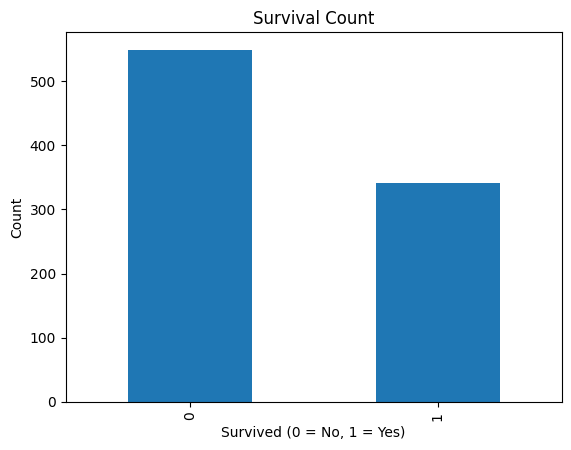

In [16]:
import matplotlib.pyplot as plt

data['Survived'].value_counts().plot(kind='bar')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


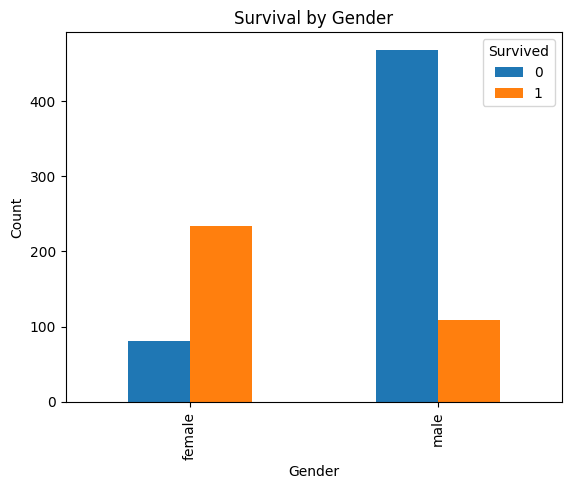

In [17]:
data.groupby('Sex')['Survived'].value_counts().unstack().plot(kind='bar')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()



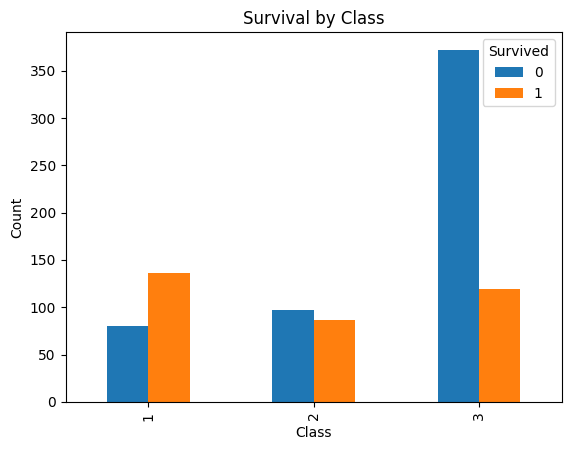

In [18]:
data.groupby('Pclass')['Survived'].value_counts().unstack().plot(kind='bar')
plt.title("Survival by Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.show()


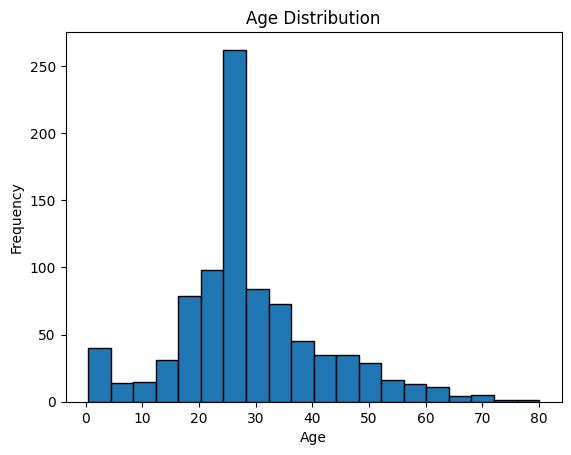

In [19]:
data['Age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
